In [24]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.utils.np_utils import to_categorical
import cv2
import tensorflow as tf
import os

In [25]:
disease_types=['COVID', 'non-COVID']
data_dir = '../input/sarscov2-ctscan-dataset/'
train_dir = os.path.join(data_dir)

In [26]:
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])      
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])

In [27]:
IMAGE_SIZE = 64
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) 
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [28]:
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
X_Train = X_train / 255.
print(X_Train.shape)

2481it [00:12, 196.09it/s]

(2481, 64, 64, 3)


In [29]:
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=2)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
model = Sequential()
model.add(Conv2D(input_shape=(64,64,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [32]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [22]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow(X_train, Y_train,batch_size=64)

training_datagen.fit(X_train)
hist = model.fit(train_generator,
               steps_per_epoch=20,
               epochs=100,
               verbose=1,
               validation_data=(X_val, Y_val))

Epoch 1/100
20/20 [==============================] - 3s 148ms/step - loss: 118.0753 - accuracy: 0.5024 - val_loss: 0.6964 - val_accuracy: 0.5015
Epoch 2/100
20/20 [==============================] - 2s 105ms/step - loss: 1.0303 - accuracy: 0.4838 - val_loss: 0.6959 - val_accuracy: 0.4985
Epoch 3/100
20/20 [==============================] - 2s 106ms/step - loss: 0.6982 - accuracy: 0.4683 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 4/100
20/20 [==============================] - 2s 106ms/step - loss: 0.6988 - accuracy: 0.4724 - val_loss: 0.6934 - val_accuracy: 0.4985
Epoch 5/100
20/20 [==============================] - 2s 105ms/step - loss: 0.6954 - accuracy: 0.5146 - val_loss: 0.6965 - val_accuracy: 0.4985
Epoch 6/100
20/20 [==============================] - 2s 119ms/step - loss: 0.6960 - accuracy: 0.4968 - val_loss: 0.6950 - val_accuracy: 0.5015
Epoch 7/100
20/20 [==============================] - 2s 110ms/step - loss: 0.6948 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.49

Epoch 58/100
20/20 [==============================] - 2s 122ms/step - loss: 0.6974 - accuracy: 0.4789 - val_loss: 0.6940 - val_accuracy: 0.4985
Epoch 59/100
20/20 [==============================] - 2s 106ms/step - loss: 0.6936 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 60/100
20/20 [==============================] - 2s 104ms/step - loss: 0.6944 - accuracy: 0.4976 - val_loss: 0.6938 - val_accuracy: 0.4985
Epoch 61/100
20/20 [==============================] - 2s 105ms/step - loss: 0.6939 - accuracy: 0.4836 - val_loss: 0.6943 - val_accuracy: 0.4985
Epoch 62/100
20/20 [==============================] - 2s 105ms/step - loss: 0.6950 - accuracy: 0.5219 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 63/100
20/20 [==============================] - 2s 117ms/step - loss: 0.6946 - accuracy: 0.4716 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 64/100
20/20 [==============================] - 2s 104ms/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy:

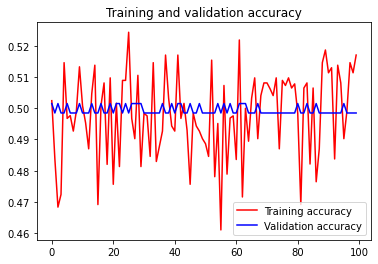

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()